Setting up iPython

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import *

Create a solution to the system with Noise which is i.i.d. $N(0,1)$.

In [2]:
N = 10 # Number of steps
t = np.linspace(0,1,N+1) # time discretisation
# Create a vector of N standard normal r.v.s to give `noise' 
noise = np.random.standard_normal(N)
# append a 0 to the start of the noise vector, and compute the cumulative sum:
X = cumsum(np.hstack((arange(1),noise)))
print(X)

[ 0.          0.06188255 -0.94633309 -0.86540862 -0.0140896   1.87146981
  3.25793055  4.46743937  4.19651372  3.75719208  3.22895843]


Plot the process $X_t$.

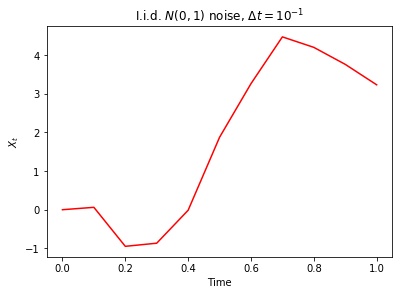

In [3]:
%matplotlib inline

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(t, X, 'r')

axes.set_xlabel(r'Time')
axes.set_ylabel(r'$X_t$')
axes.set_title(r'I.i.d. $N(0,1)$ noise, $\Delta t = 10^{-1}$');

Now lets see what happens if we vary both the type of the noise (distribution) and the time step, $\Delta t$.

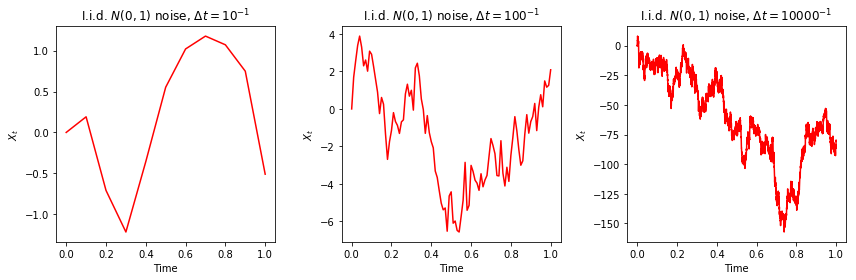

In [4]:
%matplotlib inline

# Write a simple function to return the noise vector for given N.
noise = lambda N: np.random.standard_normal(N);
NoiseType="$N(0,1)$"

# Write a function to plot the resulting X process for different values of N
def X_plot(NN,noise):
    "This plots X for all values in NN, with noise noise"
    # Set up multiple axes for plotting:
    fig, axes = plt.subplots(nrows=1, ncols=NN.size, figsize=(12,4))
    
    # Loop over NN and plots:
    for index, ax in enumerate(axes, start=0):
        #Set up $X_t$ as before:
        N = NN[index] # Number of steps
        t = np.linspace(0,1,N+1) # time discretisation
        # append a 0 to the start of the noise vector, 
        #    and compute the cumulative sum:
        X = cumsum(np.hstack((arange(1),noise(N))))
        
        ax.plot(t, X, 'r')
        
        ax.set_xlabel(r'Time')
        ax.set_ylabel(r'$X_t$')
        ax.set_title(r'I.i.d. {0} noise, $\Delta t = {1}^{{-1}}$'.format(NoiseType,N))
    
        fig.tight_layout()

NN = np.array([10,100,10000])
X_plot(NN,noise)

And now we can consider different types of noise (we keep the time-steps the same). Let's start with Uniform on $[-1,1]$.

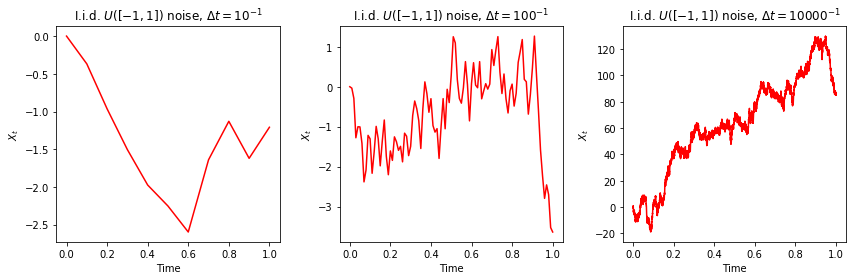

In [5]:
noise = lambda N: np.random.uniform(-1,1,N);
NoiseType="$U([-1,1])$"
X_plot(NN,noise)

And lets also try a Bernoulli distribution (so the noise is $+1$ or $-1$ with equal probability).

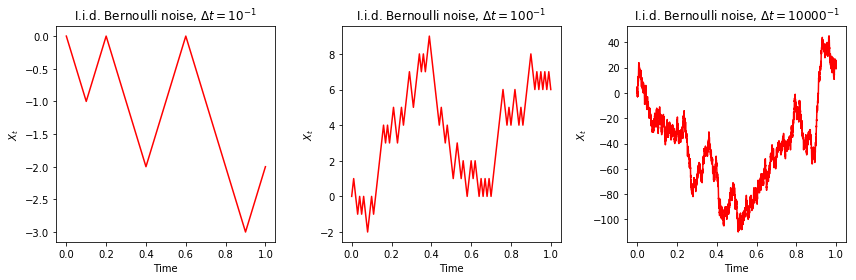

In [6]:
noise = lambda N: np.random.choice(np.array([-1,1]),N);
NoiseType="Bernoulli"
X_plot(NN,noise)

In each case, it seems that there are possible differences at the first level, but it is hard to tell things apart at the finest level. The *distribution* of the noise does not appear to matter. It is also hard to tell the pictures on the right apart at a qualitative level.

However there is one more significant issue: if we look at the $y$-axis, the scale is growing as $N$ increases. Intuitively, we are adding more noise, but not 'rescaling' the noise. Since the noise is all zero mean, scaling here means changing the variance of the increments. Let's see what happens if we take the standard deviation of the noise to behave like $\Delta t$:

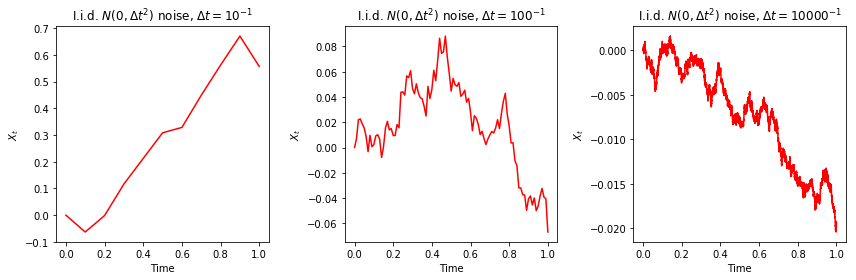

In [7]:
noise = lambda N: np.random.normal(0,1/float(N),N)
NoiseType="$N(0,\Delta t^{2})$"
X_plot(NN,noise)

Now we've gone too far. The scaling is too small! Let's try with standard deviation $\Delta t^{1/2}$ (so variance $\Delta t$):

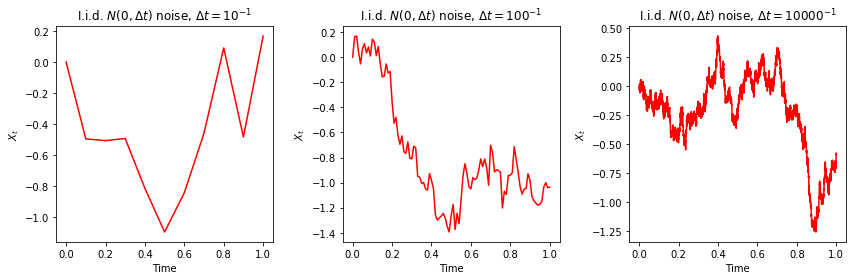

In [8]:
noise = lambda N: np.random.normal(0,1/sqrt(float(N)),N)
NoiseType="$N(0,\Delta t)$"
X_plot(NN,noise)

And now things seem to work nicely. Of course we could have predicted this very quickly: to get the value at time one, we are simply adding up i.i.d. random variables. We know that this should converge to an $N(0,1)$ random variable if we rescale to make the individual standard deviations behave like $\Delta t^{1/2}$.

Note that this rescaling tells us several things about the resulting limit: if I look at the process over an interval, the difference $X_t-X_s$ should be Normally distributed, with mean zero (assuming the noise is zero-mean), and variance proportional to the length of the interval, $t-s$.

Now lets go back to the original problem: we started by considering the case where $\mu(x) = 0$, and $\sigma(x) = 1$. What happens if we change these? Let's try the simple case where $\mu(x) = x$ and $\sigma(x) = x$. Note that in the discretisation, we should then multiply the noise term by the current value of the process, and add to this the process times the time step ($\Delta t$) to get the additional $\mu$ term:

In [9]:
# Write a function to plot the resulting X process for different values of N. 
#    We also introduce a maximum time T (this was 1)
def X_plot_geom(NN,noiseT,T):
    "This plots X for all values in NN, with noise noise and mu, sigma linear"
    # Set up multiple axes for plotting:
    fig, axes = plt.subplots(nrows=1, ncols=NN.size, figsize=(12,4))
    
    # Loop over NN and plots:
    for index, ax in enumerate(axes, start=0):
        #Set up $X_t$ as before:
        N = NN[index] # Number of steps
        t = np.linspace(0,T,N+1) # time discretisation
        Dt = t[1]-t[0]
        # start with X as a vector of ones (so X_0 = 1):
        X = np.ones(N+1)
        # Get the vector of noise:
        Z = noiseT(N,T)
        # set each new X to be the last one plus dt times X and the noise times X:
        for i in range(1,N+1):
            X[i] = X[i-1]*(1+Dt+Z[i-1])
        
        ax.plot(t, X, 'r')
        
        ax.set_xlabel(r'Time')
        ax.set_ylabel(r'$X_t$')
        ax.set_title(r'I.i.d. {0} noise, $\Delta t \approx {1}^{{-1}}$'.format(
            NoiseType,N/float(T)))
    
        fig.tight_layout()

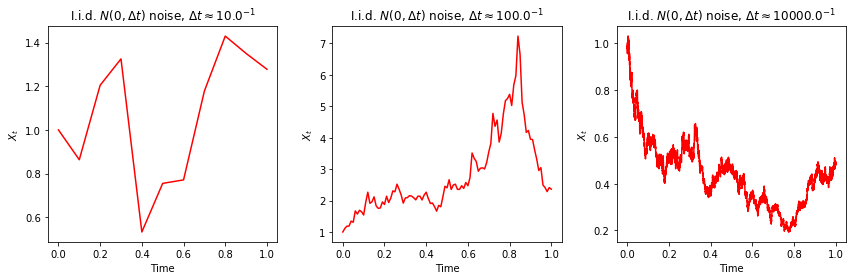

In [10]:
noiseT = lambda N,T: np.random.normal(0,sqrt(T/float(N)),N)
NoiseType="$N(0,\Delta t)$"

X_plot_geom(NN,noiseT,1)

In the case where $T=1$, for this equation it is hard (but not impossible to see a difference), however if we look at a longer time scale, we can clearly see a difference in the behaviour:

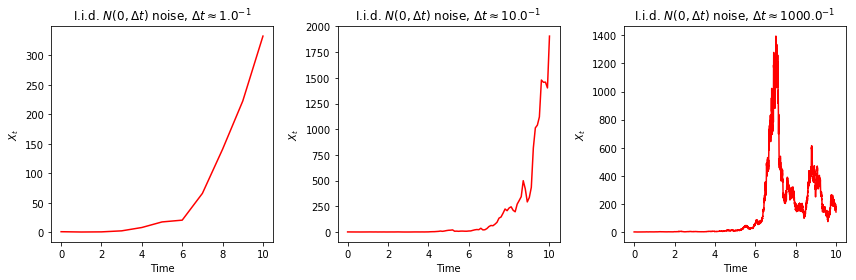

In [11]:
noiseT = lambda N,T: np.random.normal(0,sqrt(T/float(N)),N)
NoiseType="$N(0,\Delta t)$"

X_plot_geom(NN,noiseT,10)

We finish by including some different types of noise. First we consider the case where $\mu(x) = (1-x)$ and $\sigma(x) = 1$:

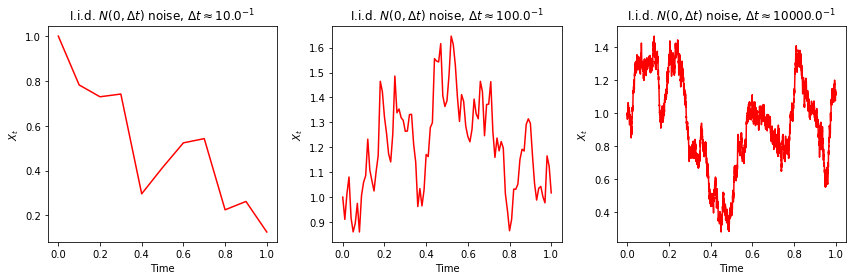

In [12]:
def X_plot_ou(NN,noiseT,T):
    "This plots X for all values in NN, with noise noise and mu, sigma linear"
    # Set up multiple axes for plotting:
    fig, axes = plt.subplots(nrows=1, ncols=NN.size, figsize=(12,4))
    
    # Loop over NN and plots:
    for index, ax in enumerate(axes, start=0):
        #Set up $X_t$ as before:
        N = NN[index] # Number of steps
        t = np.linspace(0,T,N+1) # time discretisation
        Dt = t[1]-t[0]
        # start with X as a vector of ones (so X_0 = 1):
        X = np.ones(N+1)
        # Get the vector of noise:
        Z = noiseT(N,T)
        # set each new X to be the last one plus dt times mu(X)
        #    and the noise times sigma(X):
        for i in range(1,N+1):
            X[i] = X[i-1] + Dt*(1-X[i-1]) +Z[i-1]
        
        ax.plot(t, X, 'r')
        
        ax.set_xlabel(r'Time')
        ax.set_ylabel(r'$X_t$')
        ax.set_title(r'I.i.d. {0} noise, $\Delta t \approx {1}^{{-1}}$'.format(
            NoiseType,N/float(T)))
    
        fig.tight_layout()
        
X_plot_ou(NN,noiseT,1)

On a small time horizon, this is not too different from the first case we considered. But if we make the horizon longer, we get rather different behaviour. For $T=100$, and comparing the case above with our original setup:

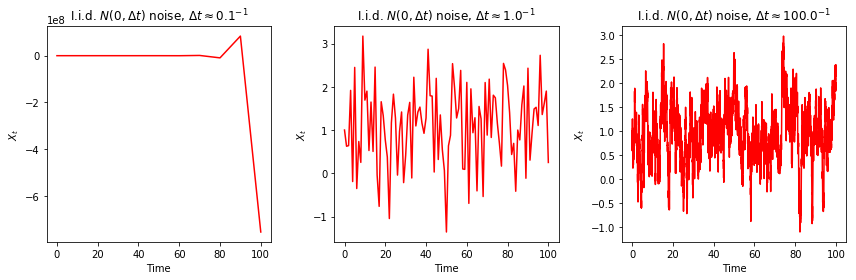

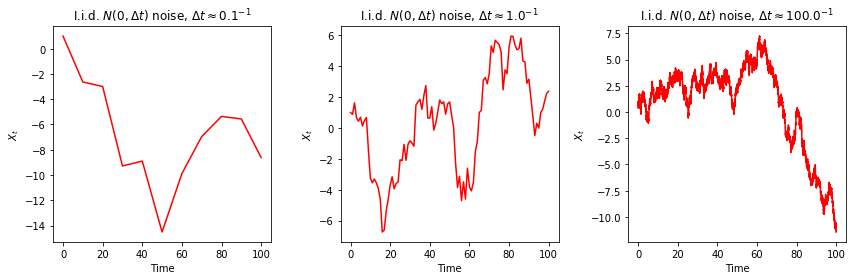

In [13]:
def X_plot_orig(NN,noiseT,T):
    "This plots X for all values in NN, with noise noise and mu, sigma linear"
    # Set up multiple axes for plotting:
    fig, axes = plt.subplots(nrows=1, ncols=NN.size, figsize=(12,4))
    
    # Loop over NN and plots:
    for index, ax in enumerate(axes, start=0):
        #Set up $X_t$ as before:
        N = NN[index] # Number of steps
        t = np.linspace(0,T,N+1) # time discretisation
        Dt = t[1]-t[0]
        # start with X as a vector of ones (so X_0 = 1):
        X = np.ones(N+1)
        # Get the vector of noise:
        Z = noiseT(N,T)
        # set each new X to be the last one plus dt times X and the noise times X:
        for i in range(1,N+1):
            X[i] = X[i-1] +Z[i-1]
        
        ax.plot(t, X, 'r')
        
        ax.set_xlabel(r'Time')
        ax.set_ylabel(r'$X_t$')
        ax.set_title(r'I.i.d. {0} noise, $\Delta t \approx {1}^{{-1}}$'.format(
            NoiseType,N/float(T)))
    
        fig.tight_layout()

X_plot_ou(NN,noiseT,100)
X_plot_orig(NN,noiseT,100)

Finally, one last example, where we allow the functions $\mu$ and $\sigma$ to depend on both $X_t$ and $t$, so $\sigma(x) = 1$ and $\mu(x) = \frac{1-x}{T-t}$.

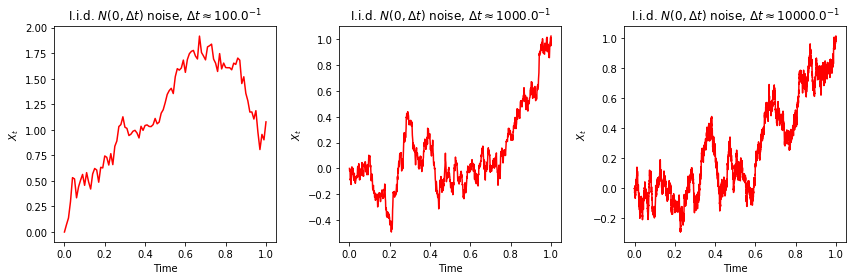

In [14]:
def X_plot_bb(NN,noiseT,T):
    "This plots X for all values in NN, with noise noise and mu, sigma linear"
    # Set up multiple axes for plotting:
    fig, axes = plt.subplots(nrows=1, ncols=NN.size, figsize=(12,4))
    
    # Loop over NN and plots:
    for index, ax in enumerate(axes, start=0):
        #Set up $X_t$ as before:
        N = NN[index] # Number of steps
        t = np.linspace(0,T,N+1) # time discretisation
        Dt = t[1]-t[0]
        # start with X as a vector of ones (so X_0 = 1):
        X = np.zeros(N+1)
        # Get the vector of noise:
        Z = noiseT(N,T)
        # set each new X to be the last one plus dt times mu(X) 
        #    and the noise times sigma(X):
        for i in range(1,N+1):
            X[i] = X[i-1] + Dt*(1.0-X[i-1])/(float(T)-t[i-1]) +Z[i-1]
        
        ax.plot(t, X, 'r')
        
        ax.set_xlabel(r'Time')
        ax.set_ylabel(r'$X_t$')
        ax.set_title(r'I.i.d. {0} noise, $\Delta t \approx {1}^{{-1}}$'.format(
            NoiseType,N/float(T)))
    
        fig.tight_layout()

NN2 = np.array([100,1000,10000])
X_plot_bb(NN2,noiseT,1)

Observe here that the plots look very similar to our original plots, but the path always ends up at 1.